# Import Dependencies

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn.multiclass

import numpy as np
import tensorflow as tf
from keras.datasets import reuters

/home/mskeegan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data[0])
print(train_labels[0])
print(train_labels[1])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
4


In [4]:
print(train_labels[0])
print(train_labels[1])

3
4


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    #Looping
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(train_data.shape, x_train.shape)
print(x_train[0])

(8982,) (8982, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [8]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
print(y_train[0:10])

[ 3.  4.  3.  4.  4.  4.  4.  3.  3. 16.]


In [9]:
## categorical encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[1])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Create Model

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(46, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 46)                782       
Total params: 161,070
Trainable params: 161,070
Non-trainable params: 0
_________________________________________________________________


# Recompiling

In [33]:
model.compile(
    optimizer="adam",
    # loss function is used by optimizer and does how much the net can still learn / loss gets smaller in train / till it merges to zero
    # binary prediciton = binary_crossentropy!
    loss="categorical_crossentropy",
    # percentage of predictions which are right! How good is the NN in generalizing!
    metrics=["accuracy"]
)

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

print(x_val.shape, partial_x_train.shape, x_test.shape)
print(y_val.shape, partial_y_train.shape, test_labels.shape)

(1000, 10000) (7982, 10000) (2246, 10000)
(1000, 46) (7982, 46) (2246, 46)


# Training

In [35]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=10,
    batch_size=128,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 139us/step - loss: 3.4121 - acc: 0.3123 - val_loss: 2.8939 - val_acc: 0.3640
Epoch 2/10
7982/7982 [==============================] - 1s 107us/step - loss: 2.4190 - acc: 0.3525 - val_loss: 2.0753 - val_acc: 0.3540
Epoch 3/10
7982/7982 [==============================] - 1s 110us/step - loss: 1.8193 - acc: 0.3567 - val_loss: 1.6699 - val_acc: 0.3650
Epoch 4/10
7982/7982 [==============================] - 1s 111us/step - loss: 1.4084 - acc: 0.4726 - val_loss: 1.2795 - val_acc: 0.7090
Epoch 5/10
7982/7982 [==============================] - 1s 109us/step - loss: 0.9381 - acc: 0.7749 - val_loss: 1.0956 - val_acc: 0.7650
Epoch 6/10
7982/7982 [==============================] - 1s 113us/step - loss: 0.7045 - acc: 0.8431 - val_loss: 1.0308 - val_acc: 0.7830
Epoch 7/10
7982/7982 [==============================] - 1s 121us/step - loss: 0.5581 - acc: 0.8791 - val_loss: 0.9953 - val_acc: 0.7930


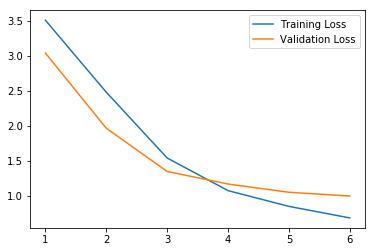

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training Loss")
plt.plot(epochs, val_loss_values, label = "Validation Loss")
plt.legend()
plt.show()

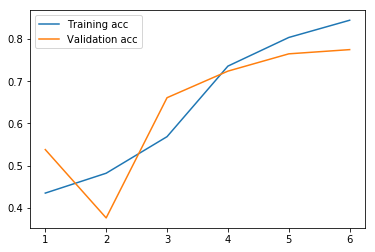

In [15]:
plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, label="Training acc")
plt.plot(epochs, val_acc_values, label = "Validation acc")
plt.legend()
#plt.show()

# Forward Propagation
layer: f(x) = y // relu (w(x)+b)
layer2: f"(x) = y // relu (w'(x)+b)  //NN multiplication between many layer functions    